<h1 align=center>Deep Learning-Based Sunspot Forecasting: An RNN Approach</font></h1>

<br>

<p align="center">
    <img src="https://i.gifer.com/36bQ.gif" height=450 width=2000 alt="Sakilar">
</p>

<small>Picture Source: <a href="https://gifer.com/en/36bQ">Saktilar</a></small>

<br>

<h2>Abstract</h2>

<p>Understanding and predicting solar activity, such as sunspots, is crucial in the context of space weather forecasting. Solar phenomena impact various technological systems, including satellite communications and power grids. In this study, we explore the application of advanced machine learning models, specifically Recurrent Neural Networks (RNNs), to improve the forecasting of sunspot activity. Leveraging the temporal dependencies inherent in solar data, our RNN-based approach aims to provide more accurate and timely predictions, enhancing our ability to mitigate the potential effects of solar events on Earth's technological infrastructure.</p>

<br>

<h2>Context</h2>

<p>In the realm of space weather, the prediction of solar phenomena plays a vital role in safeguarding technological assets on Earth. Sunspots, which are temporary and dark regions on the sun's surface, serve as crucial indicators of solar activity. These phenomena have far-reaching implications for various technological systems, including radio communication, navigation systems, and power distribution. The number and behavior of sunspots influence space weather, impacting Earth's magnetosphere and ionosphere. With an increasing dependence on technology, accurate forecasting of sunspot activity becomes essential for mitigating potential adverse effects on our interconnected systems.</p>

<br>

<p>Traditional methods of sunspot prediction often struggle to capture the intricate and dynamic patterns in solar data. This limitation has spurred the exploration of advanced machine learning techniques to improve prediction accuracy. Recurrent Neural Networks (RNNs), known for their proficiency in modeling sequential data, emerge as a promising solution. The temporal nature of sunspot activity, characterized by cycles and variations, aligns well with the strengths of RNNs. This study focuses on harnessing the capabilities of RNNs to enhance sunspot forecasting accuracy, contributing to the resilience of Earth's technological infrastructure against the impacts of space weather events.</p>


<br>

<h2>Dataset</h2>

Our analysis is based on the [Sunspot Index and Long-term Solar Observations Dataset (Yearly total sunspot number)](https://www.sidc.be/SILSO/datafiles) that provides comprehensive data on sunspot activity. This dataset, collected by the SOHO spacecraft, serves as a valuable resource for training and evaluating our machine learning models.

<br>

<h2>Keywords</h2>
<ul>
  <li>Sunspot Forecasting</li>
  <li>Recurrent Neural Networks (RNN)</li>
  <li>Space Weather Prediction</li>
  <li>Solar Activity Modeling</li>
  <li>Sunspot Index and Long-term Solar Observations Dataset</li>
</ul>

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="">Importing Libraries</a></li>
<li><a href="">Preparing Data for Sunspot Forecasting</a></li>
<li><a href="">Building RNN Model for Forecasting Sunspots</a></li>

<br>

## Importing Libraries

In [59]:
import os
import csv
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass

In [115]:
import tensorflow as tf

## Preparing Data for Sunspot Forecasting

In [2]:
file_path = '/content/SN_y_tot_V2.0.csv'

### Data Preprocessing

Data preprocessing is a critical initial step in data analysis and machine learning. It encompasses tasks like handling missing values, removing duplicates, correcting errors, scaling and normalizing data, encoding categorical variables, and selecting relevant features. Outliers are identified and managed, and time series data is appropriately treated. Data is often divided into training, validation, and testing sets, and methods are applied to address imbalances in classification datasets. This process is essential as it directly influences the quality and effectiveness of subsequent analyses or machine learning models, providing a strong foundation for deriving meaningful insights and building reliable predictive models.

In [3]:
column_names = [
    "Year",
    "Sunspot",
    "Std Dev",
    "Observations",
    "Marker"
]

In [4]:
df = pd.read_csv(file_path, delimiter=';', header=None, names=column_names)

The column names are "Year" for the Gregorian calendar year, "Sunspot" for the yearly mean total sunspot number, "Std Dev" for the yearly mean standard deviation, "Observations" for the number of observations, and "Marker" for the definitive/provisional marker.

In [5]:
df.head()

,Year,Sunspot,Std Dev,Observations,Marker
0,1700.5,8.3,-1.0,-1,1
1,1701.5,18.3,-1.0,-1,1
2,1702.5,26.7,-1.0,-1,1
3,1703.5,38.3,-1.0,-1,1
4,1704.5,60.0,-1.0,-1,1


In [6]:
df.shape

(323, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          323 non-null    float64
 1   Sunspot       323 non-null    float64
 2   Std Dev       323 non-null    float64
 3   Observations  323 non-null    int64  
 4   Marker        323 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 12.7 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,323.0,1861.500000,93.386294,1700.5,1781.00,1861.5,1942.00,2022.5
Sunspot,323.0,78.380186,61.958788,0.0,24.45,65.3,114.95,269.3
Std Dev,323.0,4.663158,5.293243,-1.0,-1.00,4.2,8.90,19.1
Observations,323.0,1157.337461,2688.504888,-1.0,-1.00,365.0,365.00,15258.0
Marker,323.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [9]:
df.isnull().sum()

Year            0
Sunspot         0
Std Dev         0
Observations    0
Marker          0
dtype: int64

After arrange the DataFrame for the training, we proceeded to save this refined dataset for future calculations and analyses. The Pandas library provides a convenient method for this purpose.

In [10]:
df.to_csv('/content/SN_y_tot_V2.0_MODIFIED.csv', index=False)

## Building RNN Model for Forecasting Sunspots

In the pursuit of a deeper understanding and more accurate predictions of solar activity, we embark on a data-driven exploration to construct an innovative forecasting model. Our focus is on developing a state-of-the-art Recurrent Neural Network (RNN) tailored specifically for forecasting sunspot trends. Drawing upon the capabilities of deep learning, this project aims to elevate our comprehension of solar dynamics, offering insights into the intricate patterns of sunspot activity. From the vast expanse of space, where sunspots play a pivotal role, to their potential impacts on Earth's technological infrastructure, our RNN-based model seeks to provide more precise and timely predictions. This journey encompasses data preprocessing, model design, rigorous training, and comprehensive evaluation, all with the overarching goal of advancing our ability to predict and understand sunspot activity—a key component in space weather forecasting and its implications for our technological systems.

### Building Functions

In [32]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Sunspot Number $S_{n}$")
    plt.grid(True)

In [26]:
def parse_data_from_file(filename):

  times = []
  sunspots = []

  with open(filename) as csvfile:

      reader = csv.reader(csvfile, delimiter=',')

      next(reader)

      step=0
      for row in reader:
          sunspots.append(float(row[1]))
          times.append(step)
          step = step + 1

  return times, sunspots

We defined train-val split as 0.8 and 0.2:

In [16]:
round(df.shape[0] * 0.8)

258

1. **SUNSPOTS_CSV** is a class attribute that stores the file path '/content/SN_y_tot_V2.0_MODIFIED.csv' presumably a CSV file containing sunspots data.

2. **times** and **sunspots** are two variables that are initialized by calling a function parse_data_from_file(SUNSPOTS_CSV). It appears that this function reads and parses data from the specified CSV file, resulting in lists of time and sunspots values.

3. **TIME** and **SERIES** are two class attributes that store NumPy arrays created from the times and sunspots data, respectively. This conversion to NumPy arrays is likely for more efficient data manipulation and analysis.

4. **SPLIT_TIME** is a class attribute with a value of `round(df.shape[0] * 0.8)`. It could be a marker used for splitting the data into training and testing sets.

5. **WINDOW_SIZE**, **BATCH_SIZE**, and **SHUFFLE_BUFFER_SIZE** are class attributes that store constants or hyperparameters for use in a machine learning model or data preprocessing. These values may be used for tasks like defining the window size for data sequences, batch size for training, and buffer size for shuffling the data.

In [72]:
@dataclass
class G:
    SUNSPOTS_CSV = '/content/SN_y_tot_V2.0_MODIFIED.csv'
    times, sunspots = parse_data_from_file(SUNSPOTS_CSV)
    TIME = np.array(times)
    SERIES = np.array(sunspots)
    SPLIT_TIME = round(df.shape[0] * 0.8)
    WINDOW_SIZE = 11
    BATCH_SIZE = 8
    SHUFFLE_BUFFER_SIZE = min(500, df.shape[0])

In [73]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

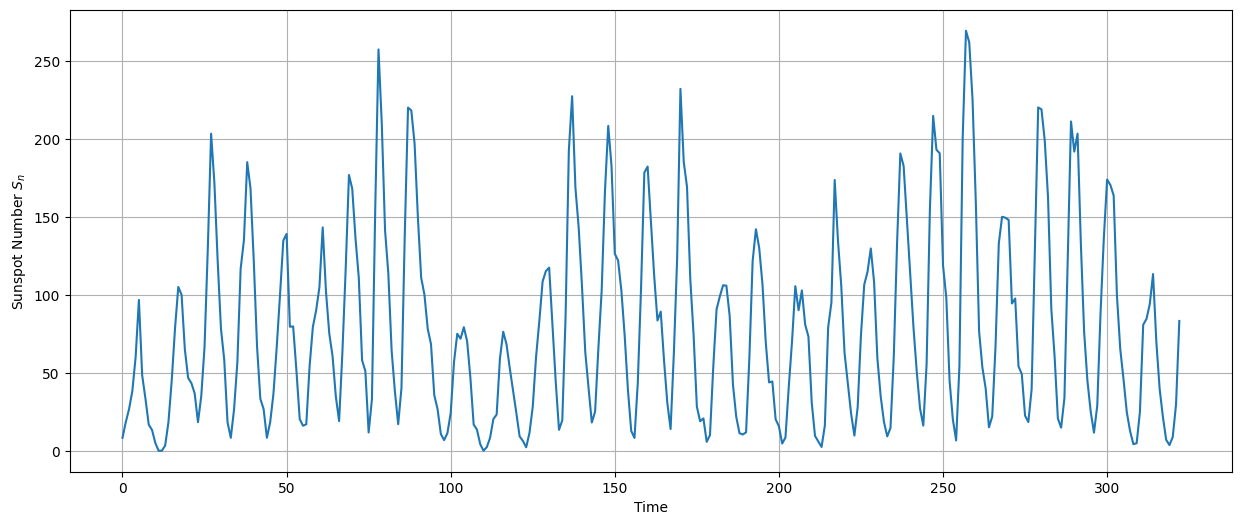

In [74]:
plt.figure(figsize=(15, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

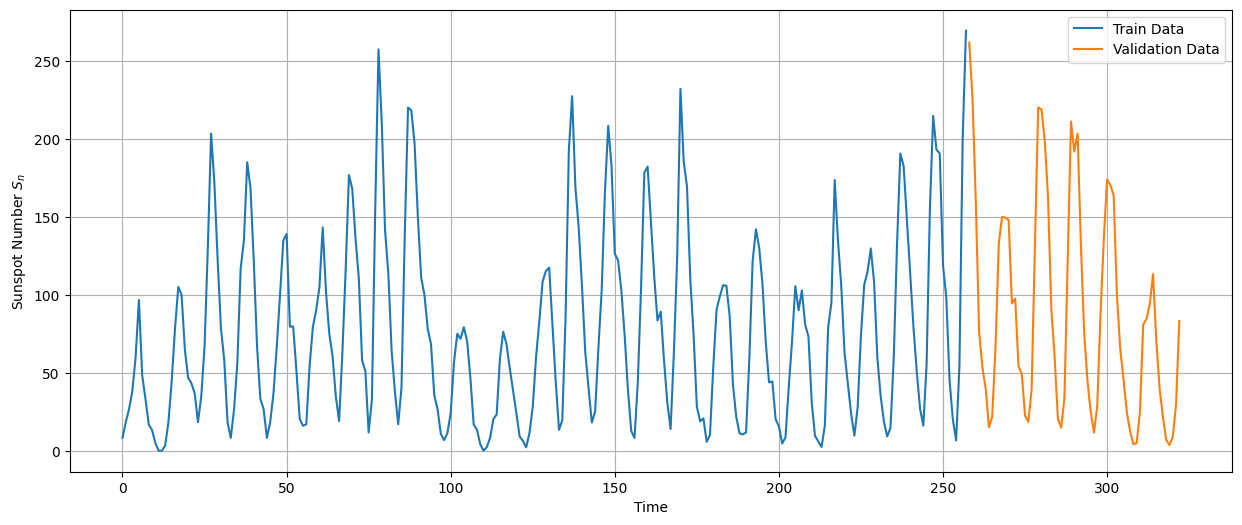

In [75]:
plt.figure(figsize=(15, 6))
plot_series(G.TIME[:G.SPLIT_TIME], G.SERIES[:G.SPLIT_TIME], label="Train Data")
plot_series(G.TIME[G.SPLIT_TIME:], G.SERIES[G.SPLIT_TIME:], label="Validation Data")
plt.legend()
plt.show()

In [76]:
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [77]:
time_train.shape

(258,)

In [78]:
time_valid.shape

(65,)

The `windowed_dataset` function processes time series data for training RNNs with TensorFlow. It creates a dataset using **TensorFlow's tf.data.Dataset API**, where each element consists of a window of data points and the corresponding target value. The function slides a fixed-size window (`window_size`) along the time series, shuffles the dataset for randomness, and batches the data for efficient training. It prefetches one batch for optimization. This utility function is designed to streamline the preparation of input data for RNN models, enabling them to learn sequential patterns in time series data. Adjustments to parameters like `batch_size`, `shuffle_buffer`, and `window_size` can be made based on specific model and dataset requirements.

In [79]:
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)

    return ds

In [80]:
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

### Building RNN Model

Our model architecture starts with a convolutional layer for local feature extraction, followed by two LSTM layers for capturing temporal dependencies, and concludes with a stack of dense layers for making predictions. This architecture is commonly used for time series forecasting tasks, and it's a combination of convolutional and recurrent neural networks to effectively model and predict sequences of data points. After defining this model, you would typically compile it with an appropriate loss function, optimizer, and metrics before training it on your data.

In [91]:
def create_uncompiled_model():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=[None, 1]),
      tf.keras.layers.LSTM(128, return_sequences=True),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64),
      tf.keras.layers.Dense(30, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu"),
      tf.keras.layers.Dense(1)
    ])

    return model

In [92]:
uncompiled_model = create_uncompiled_model()

In [93]:
uncompiled_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, None, 64)          256       
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         98816     
                                                                 
 lstm_3 (LSTM)               (None, None, 64)          49408     
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [94]:
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)

Testing model prediction with input of shape (8, 11)...
1/1 [==============================] - 2s 2s/step


In [95]:
y_pred_shape = y_pred.squeeze().shape

In [96]:
tf.keras.backend.clear_session()

Huber loss, also known as the Huber loss function, is a type of loss function used in machine learning, particularly in regression problems. It is designed to address some of the shortcomings of other loss functions like mean squared error (MSE), particularly when dealing with outliers in the data.

<br>

$$
L(y, f(x)) =
\begin{cases}
  \frac{1}{2}(y - f(x))^2 & \text{if } |y - f(x)| \leq \delta \\
  \delta(|y - f(x)| - \frac{1}{2}\delta) & \text{if } |y - f(x)| > \delta
\end{cases}
$$

<br>

When the absolute error $(|y - f(x)|)$ between the true target value $(y)$ and the predicted value by the model $f(x)$ is less than or equal to a threshold value $(\delta)$, the loss is calculated as:

<br>

$$ L(y, f(x)) = \frac{1}{2}(y - f(x))^2 $$

In this regime, the loss behaves like the squared error loss, similar to the mean squared error (MSE).

When the absolute error is greater than the threshold $(|y - f(x)| > \delta)$, the loss is calculated as:

<br>

$$ L(y, f(x)) = \delta(|y - f(x)| - \frac{1}{2}\delta) $$

In this regime, the loss becomes linear and increases with the absolute error, similar to the mean absolute error (MAE).


In [110]:
def create_model():

    model = create_uncompiled_model()

    learning_rate = 5e-5

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    return model

In [111]:
model = create_model()

In [113]:
history = model.fit(train_set, epochs=100)

Epoch 1/100
31/31 [==============================] - 7s 37ms/step - loss: 77.1294 - mae: 77.6253
Epoch 2/100
31/31 [==============================] - 1s 37ms/step - loss: 76.7815 - mae: 77.2794
Epoch 3/100
31/31 [==============================] - 1s 36ms/step - loss: 76.4140 - mae: 76.9139
Epoch 4/100
31/31 [==============================] - 1s 22ms/step - loss: 76.0913 - mae: 76.5913
Epoch 5/100
31/31 [==============================] - 1s 24ms/step - loss: 75.7318 - mae: 76.2308
Epoch 6/100
31/31 [==============================] - 1s 25ms/step - loss: 75.3344 - mae: 75.8300
Epoch 7/100
31/31 [==============================] - 1s 25ms/step - loss: 74.8720 - mae: 75.3677
Epoch 8/100
31/31 [==============================] - 1s 25ms/step - loss: 74.3283 - mae: 74.8273
Epoch 9/100
31/31 [==============================] - 1s 24ms/step - loss: 73.6734 - mae: 74.1727
Epoch 10/100
31/31 [==============================] - 1s 23ms/step - loss: 72.8581 - mae: 73.3560
Epoch 11/100
31/31 [=========

Within the context of forecasting, the model_forecast function is designed to make predictions using a given model and a time series dataset. This function processes the input time series, creating a data pipeline to prepare the data for forecasting. It employs windowing techniques to extract sequences of data, batches the sequences, and then utilizes a trained machine learning model to generate forecasts. The resulting predictions are essential for understanding and anticipating future trends and patterns within the time series data, providing valuable insights for various forecasting applications.

In [116]:
def model_forecast(model, series, window_size):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)

    return forecast

In [117]:
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

10/10 [==============================] - 1s 15ms/step


In [118]:
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

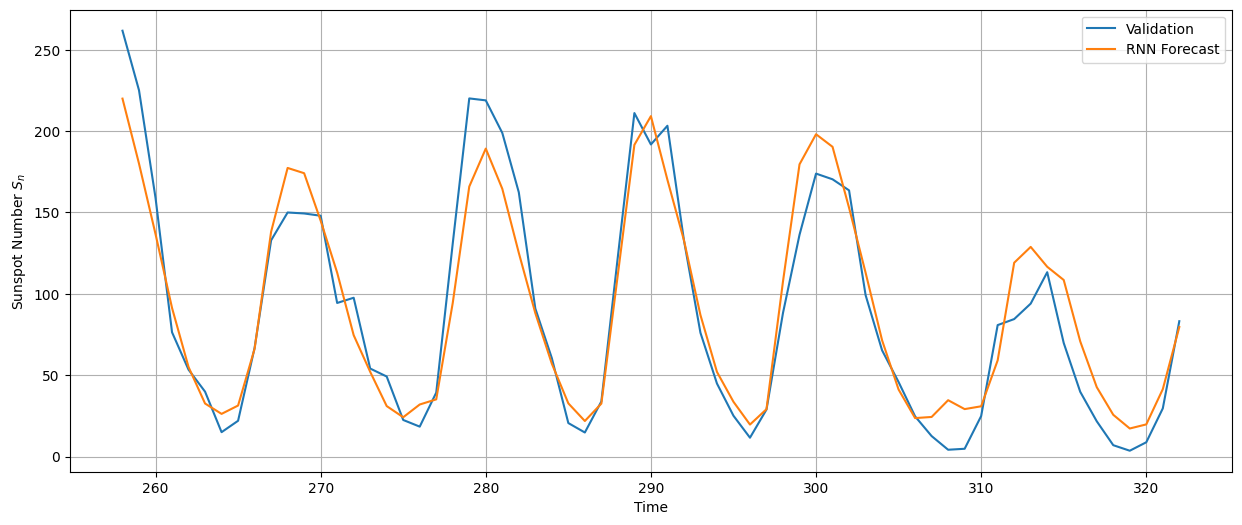

In [119]:
plt.figure(figsize=(15, 6))
plot_series(time_valid, series_valid, label='Validation')
plot_series(time_valid, rnn_forecast, label='RNN Forecast')
plt.legend()
plt.show()

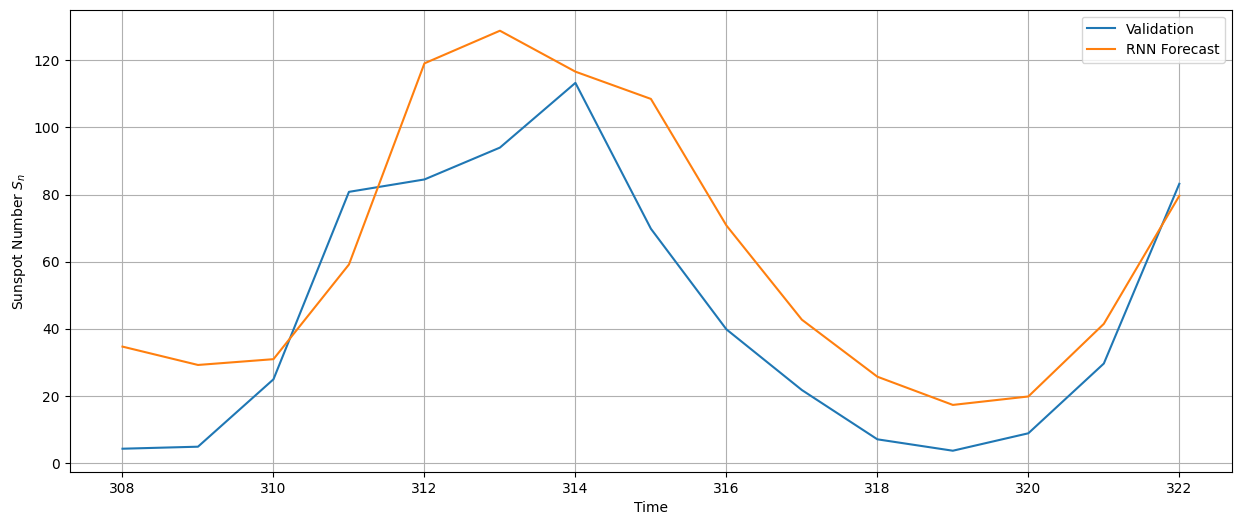

In [122]:
plt.figure(figsize=(15, 6))
plot_series(time_valid[50:], series_valid[50:], label='Validation')
plot_series(time_valid[50:], rnn_forecast[50:], label='RNN Forecast')
plt.legend()
plt.show()

Last 15 years of sunspots (average) year by year:

In [125]:
rnn_forecast[50:]

array([ 34.649433,  29.176126,  30.902933,  59.14268 , 119.12207 ,
       128.8544  , 116.646126, 108.51616 ,  70.78674 ,  42.6737  ,
        25.673803,  17.259258,  19.77656 ,  41.432224,  79.621796],
      dtype=float32)

In [126]:
series_valid[50:]

array([  4.2,   4.8,  24.9,  80.8,  84.5,  94. , 113.3,  69.8,  39.8,
        21.7,   7. ,   3.6,   8.8,  29.6,  83.2])

In [166]:
mse = tf.keras.metrics.mean_squared_error(series_valid, rnn_forecast).numpy()
mae = tf.keras.metrics.mean_absolute_error(series_valid, rnn_forecast).numpy()
print(f"MSE: {mse:.2f}, MAE: {mae:.2f} for sunspot forecast.")

MSE: 455.69, MAE: 16.77 for sunspot forecast.


### Save the Model

In [ ]:
model.save('rnn_model.h5')

In [128]:
model.save('save_model/my_model')

In [129]:
!tar -czvf save_model.tar.gz save_model/

save_model/
save_model/my_model/
save_model/my_model/fingerprint.pb
save_model/my_model/saved_model.pb
save_model/my_model/assets/
save_model/my_model/keras_metadata.pb
save_model/my_model/variables/
save_model/my_model/variables/variables.index
save_model/my_model/variables/variables.data-00000-of-00001


<h1>Contact Me</h1>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [130]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-12-10 08:08:24
